In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df =pd.read_csv("drive/My Drive/Colab Drive/ethereum_data.csv")
df.head()

,Unnamed: 0,from,to,amount,timestamp,fromIsPhi,toIsPhi
0,0,0x1f1e784a61a8ca0a90250bcd2170696655b28a21,0x1266f8b9e4dffc9e2f719bf51713f7e714516861,2.344623,1.526454e+09,0,0
1,1,0x1f1e784a61a8ca0a90250bcd2170696655b28a21,0x806ceb189d36700a97f4e7ecd4fb6c95f2c5a3de,0.070000,1.504462e+09,0,0
2,2,0x1f1e784a61a8ca0a90250bcd2170696655b28a21,0x806ceb189d36700a97f4e7ecd4fb6c95f2c5a3de,0.070000,1.504462e+09,0,0
3,3,0x1f1e784a61a8ca0a90250bcd2170696655b28a21,0x3ec4688db6bf8464b0bef30ec2ca7afc7fa7863c,5.068543,1.507806e+09,0,0
4,4,0x1f1e784a61a8ca0a90250bcd2170696655b28a21,0x3ec4688db6bf8464b0bef30ec2ca7afc7fa7863c,5.068543,1.507806e+09,0,0


In [ ]:
df['date'] = pd.to_datetime(df['timestamp'], unit='s')
df['date'] = df['date'].dt.date
df.head()

,Unnamed: 0,from,to,amount,timestamp,fromIsPhi,toIsPhi,date
0,0,0x1f1e784a61a8ca0a90250bcd2170696655b28a21,0x1266f8b9e4dffc9e2f719bf51713f7e714516861,2.344623,1.526454e+09,0,0,2018-05-16
1,1,0x1f1e784a61a8ca0a90250bcd2170696655b28a21,0x806ceb189d36700a97f4e7ecd4fb6c95f2c5a3de,0.070000,1.504462e+09,0,0,2017-09-03
2,2,0x1f1e784a61a8ca0a90250bcd2170696655b28a21,0x806ceb189d36700a97f4e7ecd4fb6c95f2c5a3de,0.070000,1.504462e+09,0,0,2017-09-03
3,3,0x1f1e784a61a8ca0a90250bcd2170696655b28a21,0x3ec4688db6bf8464b0bef30ec2ca7afc7fa7863c,5.068543,1.507806e+09,0,0,2017-10-12
4,4,0x1f1e784a61a8ca0a90250bcd2170696655b28a21,0x3ec4688db6bf8464b0bef30ec2ca7afc7fa7863c,5.068543,1.507806e+09,0,0,2017-10-12


In [ ]:
# Convert the "date" column to a datetime object
df['date'] = pd.to_datetime(df['date'])

# Define the date range
start_date = pd.to_datetime("2017-01-01")
end_date = pd.to_datetime("2019-01-01")

# Filter the dataset to include only transactions within the date range
filtered_df = df[(df['date'] >= start_date) & (df['date'] < end_date)]

# Now, filtered_df contains only the transactions between the specified date range

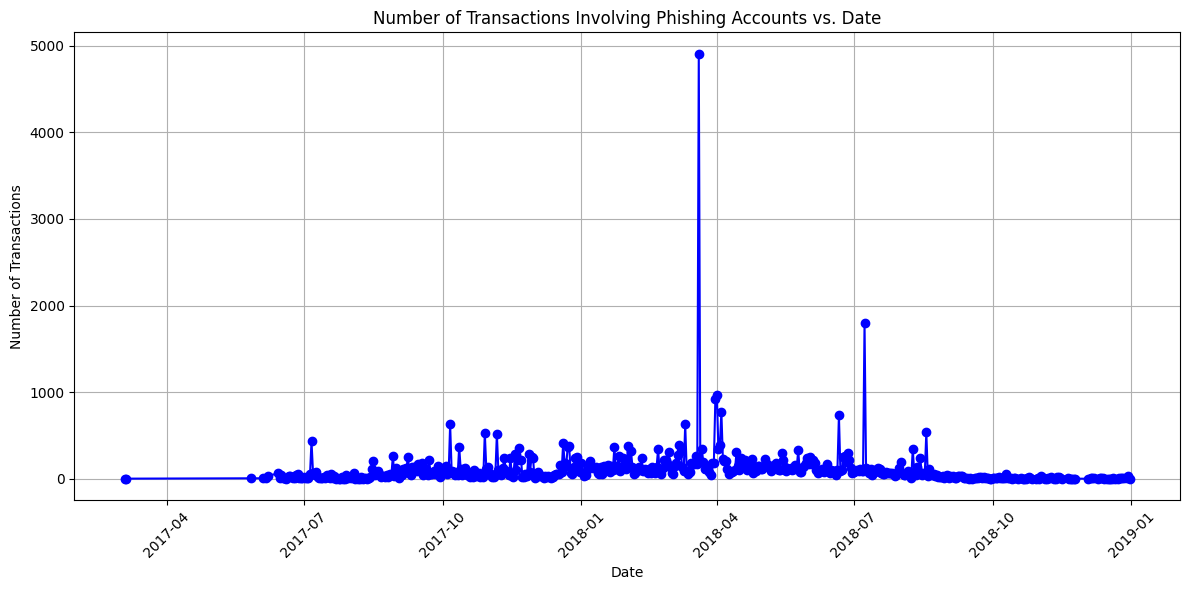

In [ ]:
# Filter transactions involving phishing accounts
phishing_transactions = filtered_df[(filtered_df['fromIsPhi'] == 1) | (filtered_df['toIsPhi'] == 1)]

# Group transactions by date and count the number of transactions per day
daily_transaction_counts = phishing_transactions['date'].dt.date.value_counts().sort_index()

# Create a plot
plt.figure(figsize=(12, 6))
plt.plot(daily_transaction_counts.index, daily_transaction_counts.values, marker='o', linestyle='-', color='b')

# Customize the plot
plt.title('Number of Transactions Involving Phishing Accounts vs. Date')
plt.xlabel('Date')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45)
plt.grid(True)

# Display the plot
plt.tight_layout()
plt.show()

In [ ]:
df = filtered_df

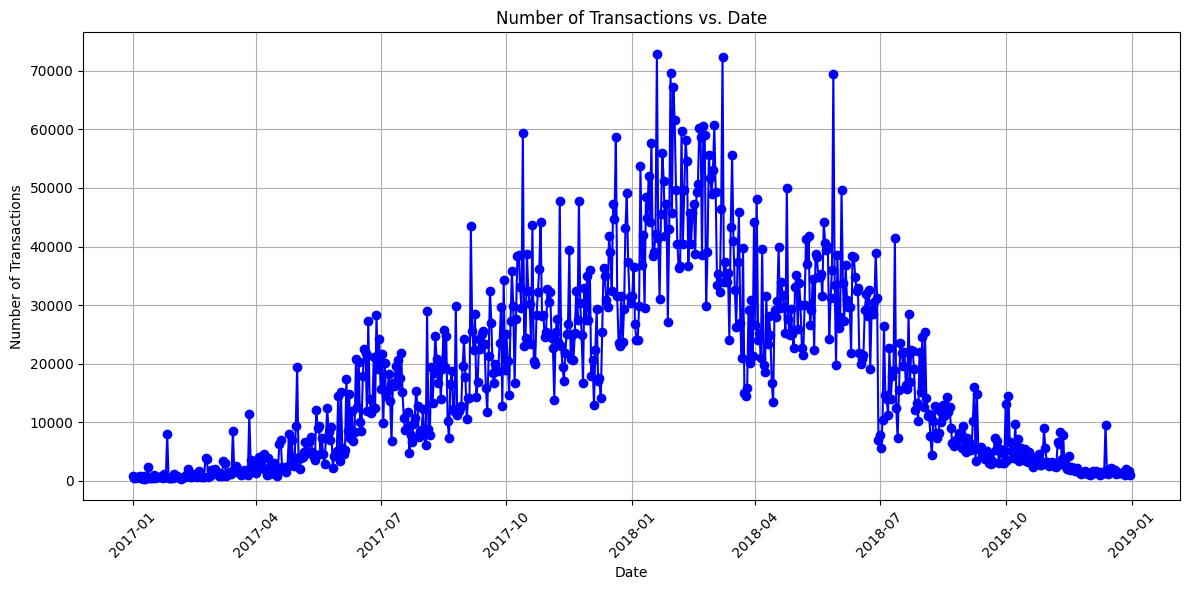

In [ ]:
# Convert the "date" column to a datetime object
df['date'] = pd.to_datetime(df['date'])

# Group transactions by date and count the number of transactions per day
daily_transaction_counts = df['date'].dt.date.value_counts().sort_index()

# Create a line graph
plt.figure(figsize=(12, 6))
plt.plot(daily_transaction_counts.index, daily_transaction_counts.values, marker='o', linestyle='-', color='b')

# Customize the graph
plt.title('Number of Transactions vs. Date')
plt.xlabel('Date')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45)
plt.grid(True)

# Display the graph
plt.tight_layout()
plt.show()

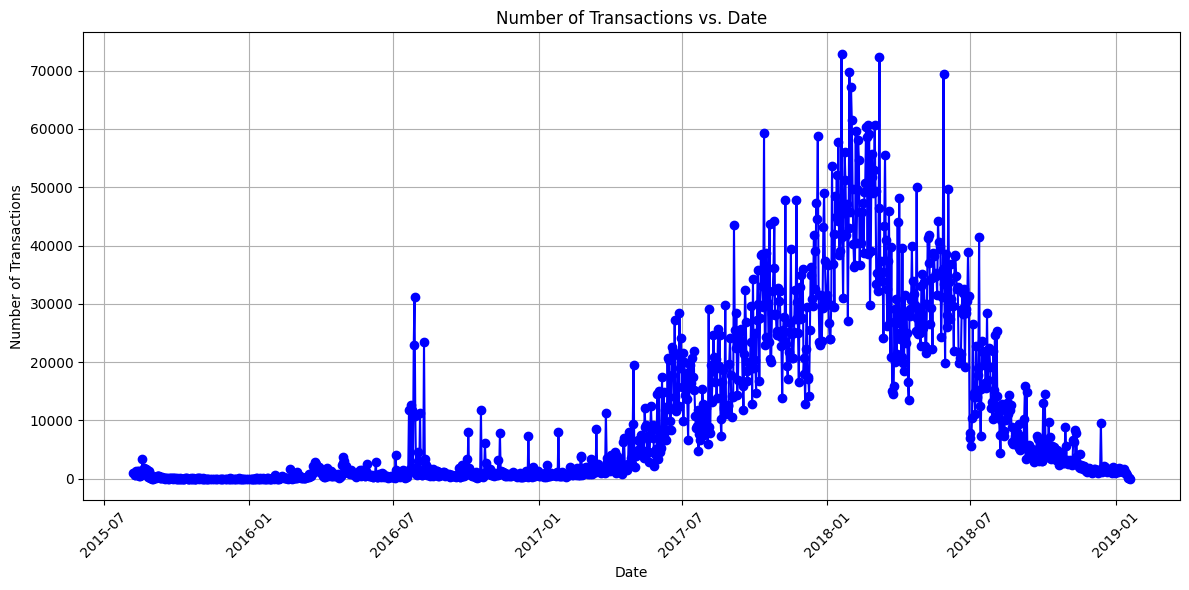

In [ ]:
# Convert the "date" column to a datetime object
df['date'] = pd.to_datetime(df['date'])

# Group transactions by date and count the number of transactions per day
daily_transaction_counts = df['date'].dt.date.value_counts().sort_index()

# Create a line graph
plt.figure(figsize=(12, 6))
plt.plot(daily_transaction_counts.index, daily_transaction_counts.values, marker='o', linestyle='-', color='b')

# Customize the graph
plt.title('Number of Transactions vs. Date')
plt.xlabel('Date')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45)
plt.grid(True)

# Display the graph
plt.tight_layout()
plt.show()

In [ ]:
filtered_df.to_csv('2year_data.csv', index=False)

In [ ]:
from google.colab import files

files.download('2year_data.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# New Section

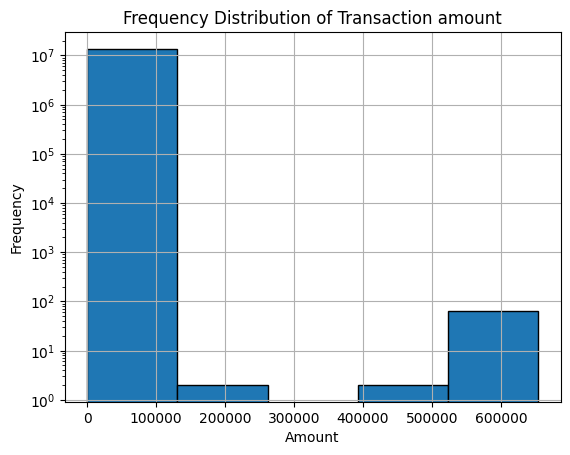

In [ ]:
#plt.figure(figsize=(8, 6))
plt.hist(df['amount'], bins=5, edgecolor='k',log=True)  # Adjust the number of bins as needed
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.title('Frequency Distribution of Transaction amount')
plt.grid(True)
plt.show()

In [ ]:
#No of phishing and non phishing accounts
selected_columns1 = df[["from","fromIsPhi"]]
new_df1 = selected_columns1.copy()
selected_columns2 = df[["to","toIsPhi"]]
new_df2 = selected_columns2.copy()


new_df1.rename(columns = {'from':'ID', 'fromIsPhi':'IsPhi'}, inplace = True)
new_df2.rename(columns = {'to':'ID', 'toIsPhi':'IsPhi'}, inplace = True)



dataframe = [new_df1, new_df2]
allids = pd.concat(dataframe)



uniqueids=allids.drop_duplicates()


uniqueids



uniqueids.IsPhi.value_counts()


0    2972324
1       1165
Name: IsPhi, dtype: int64

In [ ]:
#No of total days
df.date.nunique(dropna = False)

1232

In [ ]:

# Create a list of unique dates sorted in ascending order
dates = sorted(df["date"].unique())

# Create a list of unique users
users = sorted(set(df["from"]).union(set(df["to"])))

# Initialize a list to store the individual amt_matrices
amt_matrices = []

date_ = dates[0]
# Create a new amt_matrix for each date
amt_matrix = np.zeros((len(users), len(users), 1))

# Create a dictionary to map users to their indices
di = {user: i for i, user in enumerate(users)}

# Filter the DataFrame for the current date
df_temp = df[df["date"] == date_]

# Fill the amt_matrix with amounts
for x, y, z in zip(df_temp["from"], df_temp["to"], df_temp["amount"]):
    amt_matrix[di[x]][di[y]][0] += z

# Append the current amt_matrix to the list
amt_matrices.append(amt_matrix)
print(amt_matrices)

[array([[[0.],
        [0.],
        [0.],
        ...,
        [0.],
        [0.],
        [0.]],

       [[0.],
        [0.],
        [0.],
        ...,
        [0.],
        [0.],
        [0.]],

       [[0.],
        [0.],
        [0.],
        ...,
        [0.],
        [0.],
        [0.]],

       ...,

       [[0.],
        [0.],
        [0.],
        ...,
        [0.],
        [0.],
        [0.]],

       [[0.],
        [0.],
        [0.],
        ...,
        [0.],
        [0.],
        [0.]],

       [[0.],
        [0.],
        [0.],
        ...,
        [0.],
        [0.],
        [0.]]])]


In [ ]:
print(amt_matrix)

[[[0.]
  [0.]
  [0.]
  ...
  [0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]
  ...
  [0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]
  ...
  [0.]
  [0.]
  [0.]]

 ...

 [[0.]
  [0.]
  [0.]
  ...
  [0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]
  ...
  [0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]
  ...
  [0.]
  [0.]
  [0.]]]


In [ ]:
amt_matrix = None

In [ ]:
memory_size = amt_matrix.nbytes

print("Memory occupied by the array:", memory_size, "bytes")

AttributeError: ignored

In [ ]:

# Create a list of unique dates sorted in ascending order
dates = sorted(df["date"].unique())

# Create a list of unique users
users = sorted(set(df["from"]).union(set(df["to"])))

# Initialize a list to store the individual amt_matrices
amt_matrices = []

date_ = dates[0]
# Create a new amt_matrix for each date
amt_matrix = np.zeros((len(users), len(users), 1))

# Create a dictionary to map users to their indices
di = {user: i for i, user in enumerate(users)}

# Filter the DataFrame for the current date
df_temp = df[df["date"] == date_]

# Fill the amt_matrix with amounts
for x, y, z in zip(df_temp["from"], df_temp["to"], df_temp["amount"]):
    amt_matrix[di[x]][di[y]][0] += z

print(amt_matrix)

[[[0.]
  [0.]
  [0.]
  ...
  [0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]
  ...
  [0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]
  ...
  [0.]
  [0.]
  [0.]]

 ...

 [[0.]
  [0.]
  [0.]
  ...
  [0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]
  ...
  [0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]
  ...
  [0.]
  [0.]
  [0.]]]


In [ ]:
amt_matrix = None

In [ ]:

# Create a list of unique dates sorted in ascending order
dates = sorted(df["date"].unique())

# Create a list of unique users
users = sorted(set(df["from"]).union(set(df["to"])))

# Initialize a list to store the individual amt_matrices
amt_matrices = []

date_ = dates[0]
# Create a new amt_matrix for each date
amt_matrix = np.zeros((len(users), len(users), 1))

# Create a dictionary to map users to their indices
di = {user: i for i, user in enumerate(users)}

# Filter the DataFrame for the current date
df_temp = df[df["date"] == date_]

# Fill the amt_matrix with amounts
for x, y, z in zip(df_temp["from"], df_temp["to"], df_temp["amount"]):
    amt_matrix[di[x]][di[y]][0] += z

print(amt_matrix)

[[[0.]
  [0.]
  [0.]
  ...
  [0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]
  ...
  [0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]
  ...
  [0.]
  [0.]
  [0.]]

 ...

 [[0.]
  [0.]
  [0.]
  ...
  [0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]
  ...
  [0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]
  ...
  [0.]
  [0.]
  [0.]]]


In [ ]:
fromphi_df = df[(df["fromIsPhi"] == 1) & (df["toIsPhi"] == 0)]
tophi_df = df[(df["toIsPhi"] == 1) & (df["fromIsPhi"] == 0)]
fromandtophi_df = df[(df["toIsPhi"] == 1) & (df["fromIsPhi"] == 1)]

In [ ]:
# Write the DataFrame to CSV file.
drive.mount('/gdrive')
with open('/gdrive/My Drive/sampled_data.csv', 'w') as f:
  sampled_df.to_csv(f)


Mounted at /gdrive


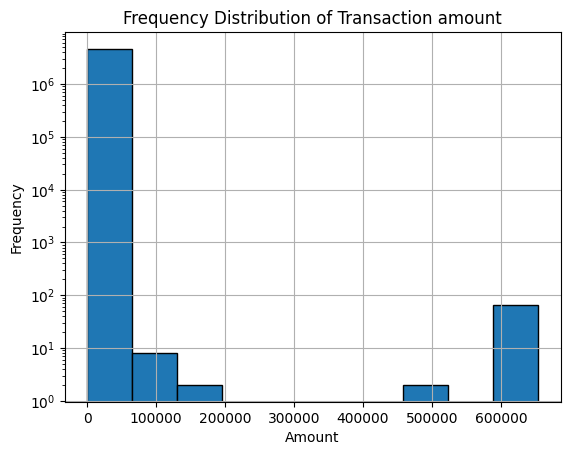

In [ ]:
#plt.figure(figsize=(8, 6))
plt.hist(df['amount'], edgecolor='k',log = True)  # Adjust the number of bins as needed
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.title('Frequency Distribution of Transaction amount')
plt.grid(True)
plt.show()

In [ ]:
# to remove the transaction amount zero datapoints
# Define the condition to select rows to keep
condition = df['amount'] != 0

# Use boolean indexing to keep rows that meet the condition
df = df[condition]

print(df)

          Unnamed: 0                                        from  \
0                  0  0x1f1e784a61a8ca0a90250bcd2170696655b28a21   
1                  1  0x1f1e784a61a8ca0a90250bcd2170696655b28a21   
2                  2  0x1f1e784a61a8ca0a90250bcd2170696655b28a21   
3                  3  0x1f1e784a61a8ca0a90250bcd2170696655b28a21   
4                  4  0x1f1e784a61a8ca0a90250bcd2170696655b28a21   
...              ...                                         ...   
13551298    13551298  0x0f4153c9e7e34528960628d827a11d522f7641a9   
13551299    13551299  0x0f4153c9e7e34528960628d827a11d522f7641a9   
13551300    13551300  0x5462733634994f5f9ad258de7bd9aeb6c8caceeb   
13551301    13551301  0x5b2757a623c829105cbcb9c626f086c60f813a8a   
13551302    13551302  0x5b2757a623c829105cbcb9c626f086c60f813a8a   

                                                  to    amount     timestamp  \
0         0x1266f8b9e4dffc9e2f719bf51713f7e714516861  2.344623  1.526454e+09   
1         0x806ceb189d3

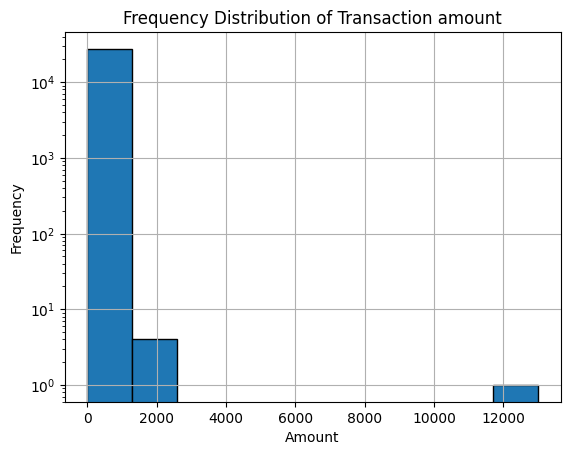

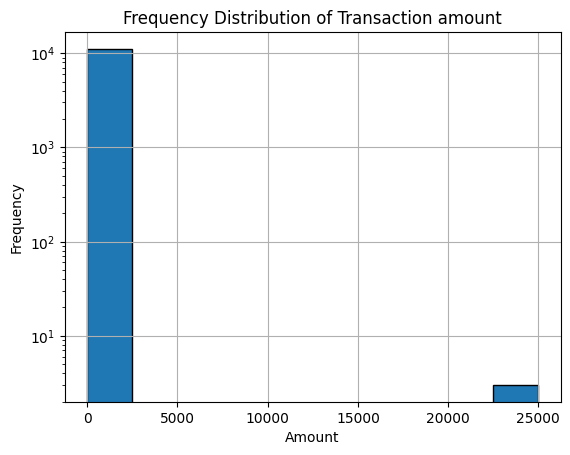

In [ ]:
#plt.figure(figsize=(8, 6))
plt.hist(tophi_df['amount'], edgecolor='k',log = True)  # Adjust the number of bins as needed
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.title('Frequency Distribution of Transaction amount')
plt.grid(True)
plt.show()
plt.hist(fromphi_df['amount'], edgecolor='k',log = True)  # Adjust the number of bins as needed
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.title('Frequency Distribution of Transaction amount')
plt.grid(True)
plt.show()

In [ ]:
print(fromandtophi_df.shape)
print(fromphi_df.shape)
print(tophi_df.shape)
print(10860+245+27251)

(245, 8)
(10860, 8)
(27251, 8)
38356


In [ ]:
# Import Drive API and authenticate.
from google.colab import drive

# Mount your Drive to the Colab VM.
drive.mount('/gdrive')

# Write the DataFrame to CSV file.
with open('/gdrive/My Drive/fromphi.csv', 'w') as f:
  fromphi_df.to_csv(f)
with open('/gdrive/My Drive/tophi.csv', 'w') as f:
  tophi_df.to_csv(f)

In [ ]:
notphisample_df = df[(df["toIsPhi"] == 0) & (df["fromIsPhi"] == 0)].sample(n=38356, random_state=1)

In [ ]:
dfs = [allphi_df,notphi_df]
sampled_df = pd.concat(dfs)

In [ ]:
dfs = [fromandtophi_df,tophi_df,fromphi_df]
allphi_df = pd.concat(dfs)

In [ ]:
allphi_df

,Unnamed: 0,from,to,amount,timestamp,fromIsPhi,toIsPhi,date
77056,77056,0x40949225c4a1745a9946f6aaf763241c082cb9ac,0x336a3f0c4d40b1e39cee72e2e59330daf484848c,0.200000,1.524903e+09,1,1,2018-04-28
77057,77057,0x40949225c4a1745a9946f6aaf763241c082cb9ac,0x336a3f0c4d40b1e39cee72e2e59330daf484848c,0.200000,1.524903e+09,1,1,2018-04-28
77058,77058,0x40949225c4a1745a9946f6aaf763241c082cb9ac,0x336a3f0c4d40b1e39cee72e2e59330daf484848c,0.200000,1.524903e+09,1,1,2018-04-28
370408,370408,0x5208d7f63a089906889a5a9caed81e9c889e64f8,0xff8e6af02d41a576a0c82f7835535193e1a6bccc,0.200000,1.530740e+09,1,1,2018-07-04
845643,845643,0x44a7ff01f7d38c73530c279e19d31527bdcf8c78,0x3cbd2e6143f057bd49ffb4c7058217a5900c35d3,0.003447,1.527003e+09,1,1,2018-05-22
...,...,...,...,...,...,...,...,...
12517015,12517015,0xa839f422311310f82717cac3bdad42dab2af429d,0x7197442d646d87662d472ef46db9821698bedb95,0.309139,1.546874e+09,1,0,2019-01-07
12522113,12522113,0xbde430f54a63016d8a5f31f243761653728086a2,0x95f1d0c9a5aae8c25624e611ed88ab50b2ab3d70,2.237744,1.547284e+09,1,0,2019-01-12
12559933,12559933,0xfbb62df5cbc8d0bc4c2a0e5c53b8602d49471495,0x3613ef1125a078ef96ffc898c4ec28d73c5b8c52,0.119164,1.522954e+09,1,0,2018-04-05
12559934,12559934,0xfbb62df5cbc8d0bc4c2a0e5c53b8602d49471495,0x3613ef1125a078ef96ffc898c4ec28d73c5b8c52,0.119164,1.522954e+09,1,0,2018-04-05


from matplotlib import pyplot as plt
allphi_df['Unnamed: 0'].plot(kind='hist', bins=20, title='Unnamed: 0')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
allphi_df['amount'].plot(kind='hist', bins=20, title='amount')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
allphi_df['timestamp'].plot(kind='hist', bins=20, title='timestamp')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
allphi_df['fromIsPhi'].plot(kind='hist', bins=20, title='fromIsPhi')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
allphi_df.plot(kind='scatter', x='Unnamed: 0', y='amount', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
allphi_df.plot(kind='scatter', x='amount', y='timestamp', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
allphi_df.plot(kind='scatter', x='timestamp', y='fromIsPhi', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
allphi_df.plot(kind='scatter', x='fromIsPhi', y='toIsPhi', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['timestamp']
  ys = series['Unnamed: 0']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = allphi_df.sort_values('timestamp', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('timestamp')
_ = plt.ylabel('Unnamed: 0')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['timestamp']
  ys = series['amount']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = allphi_df.sort_values('timestamp', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('timestamp')
_ = plt.ylabel('amount')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['timestamp']
  ys = series['fromIsPhi']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = allphi_df.sort_values('timestamp', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('timestamp')
_ = plt.ylabel('fromIsPhi')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['timestamp']
  ys = series['toIsPhi']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = allphi_df.sort_values('timestamp', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('timestamp')
_ = plt.ylabel('toIsPhi')

from matplotlib import pyplot as plt
allphi_df['Unnamed: 0'].plot(kind='line', figsize=(8, 4), title='Unnamed: 0')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
allphi_df['amount'].plot(kind='line', figsize=(8, 4), title='amount')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
allphi_df['timestamp'].plot(kind='line', figsize=(8, 4), title='timestamp')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
allphi_df['fromIsPhi'].plot(kind='line', figsize=(8, 4), title='fromIsPhi')
plt.gca().spines[['top', 'right']].set_visible(False)

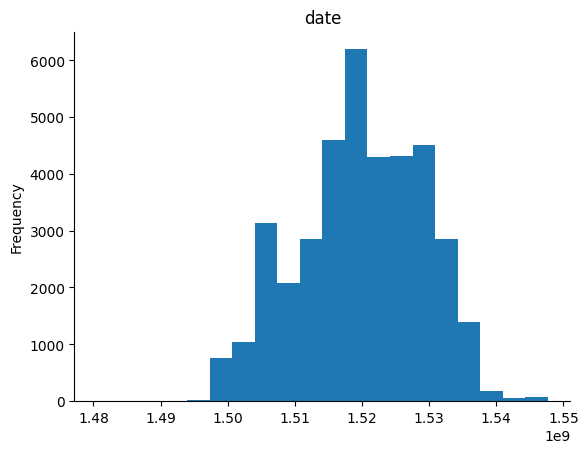

In [ ]:
from matplotlib import pyplot as plt
allphi_df['timestamp'].plot(kind='hist', bins=20, title='date')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
#timestamp above 1.495 and below 1.54 sampling 0_0
notphi_df = df[(df["timestamp"] > 1.495e+9) & (df["timestamp"] < 1.54e+9) & (df["toIsPhi"] == 0) & (df["fromIsPhi"] == 0)].sample(n=38356, random_state=1)

In [ ]:
notphi_df

,Unnamed: 0,from,to,amount,timestamp,fromIsPhi,toIsPhi,date
2186171,2186171,0x818e6fecd516ecc3849daf6845e3ec868087b755,0x91a502c678605fbce581eae053319747482276b9,0.010000,1.531036e+09,0,0,2018-07-08
412692,412692,0x52bc44d5378309ee2abf1539bf71de1b7d7be3b5,0x989a818d37672117d55d76b5767c177d85ad8a41,0.051014,1.509416e+09,0,0,2017-10-31
1245937,1245937,0x2a65aca4d5fc5b5c859090a6c34d164135398226,0x4e2d26dc3cd655e035a8b7ac9f8d5d3b4984128a,0.050186,1.505307e+09,0,0,2017-09-13
774237,774237,0xf73c3c65bde10bf26c2e1763104e609a41702efe,0x5abea01b9e3e3ca0385551f88045e93e3e07d795,3.105727,1.514551e+09,0,0,2017-12-29
10676184,10676184,0x7757f2d87c71af7d9753bcff7a9ed4445cadf4fb,0x8d328ef333645115937f2bcfd6bcfa73b532630d,4.496658,1.527872e+09,0,0,2018-06-01
...,...,...,...,...,...,...,...,...
6726461,6726461,0x6ab2288dc44d7df0929dd15843c9f59382d24e0d,0x2fb391d05adcc62fc840afe899615a4daedd8613,0.010000,1.512845e+09,0,0,2017-12-09
2400361,2400361,0x5d99b40c52f5d29fee80618ec130659dec820807,0x6d2db480bddca62a4f17e6d7f13d96e4f8def19c,0.041566,1.529076e+09,0,0,2018-06-15
10321681,10321681,0x2fc2c6fedb5452cac9fbc7d4e6d38c091f336c45,0x6edb9d6547befc3397801c94bb8c97d2e8087e2f,1.048832,1.530092e+09,0,0,2018-06-27
9466690,9466690,0x014873b33c056a46260544e89112250147514fe8,0x7ae17a0f6f8f02b5b6e76b327db15f91306194e6,12.190216,1.504853e+09,0,0,2017-09-08


In [ ]:
adj_matrix = np.zeros

In [ ]:
!pip install torch_geometric

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 8.4 MB/s eta 0:00:00


In [ ]:
from torch_geometric.datasets import Planetoid

dataset = Planetoid(root='/tmp/Cora', name='Cora')
graph = dataset[0]

Processing...
Done!


In [ ]:
print(type(graph))

<class 'torch_geometric.data.data.Data'>
